In [41]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn_evaluation import plot
from sklearn.svm import SVC

In [70]:
data1 = make_blobs(10000,cluster_std=1)

In [71]:
s1 = pd.DataFrame(data1[0])
st1 = pd.DataFrame(data1[1],columns=['target'])

In [72]:
data1 = pd.concat([s1,st1],axis=1)

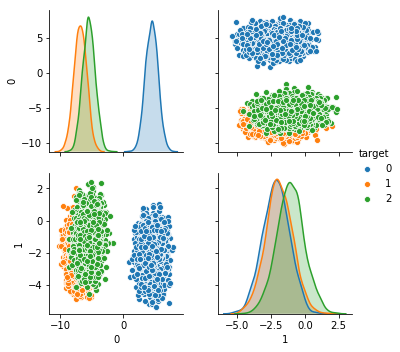

In [73]:
sns.pairplot(data1,vars=data1.columns[:-1],hue='target')

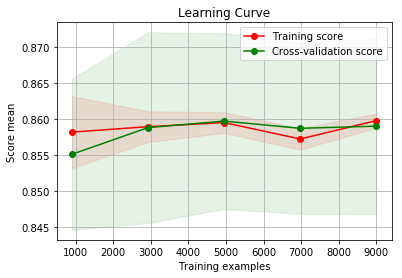

In [93]:
l1 = learning_curve(SVC(),data1.iloc[:,:-1],data1.iloc[:,-1],cv=10,n_jobs=-1)
plot.learning_curve(l1[1],l1[2],l1[0]) 

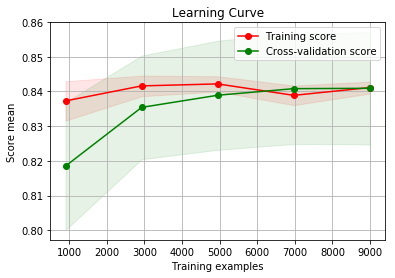

In [83]:
l2 = learning_curve(LogisticRegression(),data1.iloc[:,:-1],data1.iloc[:,-1],cv=10,n_jobs=-1)
plot.learning_curve(l2[1],l2[2],l2[0]) 

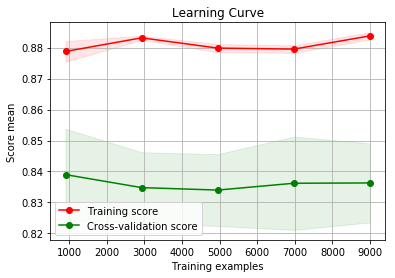

In [84]:
l3 = learning_curve(KNeighborsClassifier(),data1.iloc[:,:-1],data1.iloc[:,-1],cv=10,n_jobs=-1)
plot.learning_curve(l3[1],l3[2],l3[0]) 

---

In [85]:
data3 = make_blobs(100,cluster_std=3) 

In [86]:
s3 = pd.DataFrame(data3[0])
st3 = pd.DataFrame(data3[1],columns=['target'])

In [87]:
data3 = pd.concat([s3,st3],axis=1)

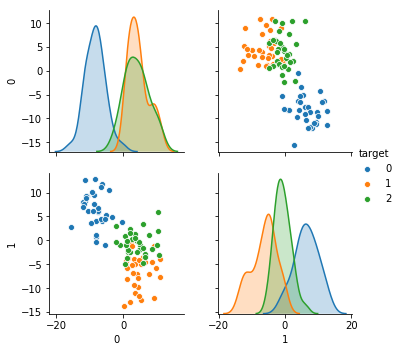

In [88]:
sns.pairplot(data3,vars=data3.columns[:-1],hue='target')

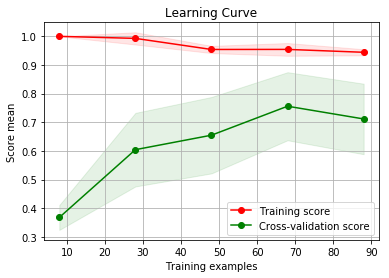

In [95]:
t1 = learning_curve(SVC(),data3.iloc[:,:-1],data3.iloc[:,-1],cv=10,n_jobs=-1)
plot.learning_curve(t1[1],t1[2],t1[0]) 

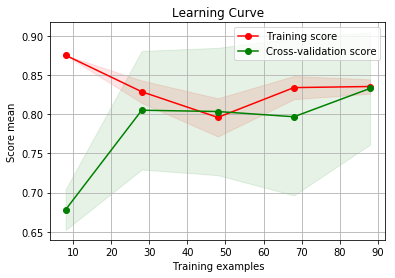

In [98]:
t2 = learning_curve(LogisticRegression(),data3.iloc[:,:-1],data3.iloc[:,-1],cv=10,n_jobs=-1)
plot.learning_curve(t2[1],t2[2],t2[0]) 

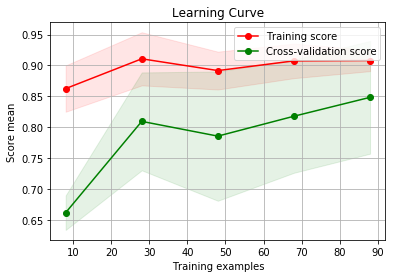

In [99]:
t3 = learning_curve(KNeighborsClassifier(),data3.iloc[:,:-1],data3.iloc[:,-1],cv=10,n_jobs=-1)
plot.learning_curve(t3[1],t3[2],t3[0]) 

In [52]:
data1 = make_blobs(10000,cluster_std=1)

In [60]:
import multiprocessing

In [61]:
dir(multiprocessing)

['Array',
 'AuthenticationError',
 'Barrier',
 'BoundedSemaphore',
 'BufferTooShort',
 'Condition',
 'Event',
 'JoinableQueue',
 'Lock',
 'Manager',
 'Pipe',
 'Pool',
 'Process',
 'ProcessError',
 'Queue',
 'RLock',
 'RawArray',
 'RawValue',
 'SUBDEBUG',
 'SUBWARNING',
 'Semaphore',
 'SimpleQueue',
 'TimeoutError',
 'Value',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'active_children',
 'allow_connection_pickling',
 'connection',
 'context',
 'cpu_count',
 'current_process',
 'freeze_support',
 'get_all_start_methods',
 'get_context',
 'get_logger',
 'get_start_method',
 'log_to_stderr',
 'pool',
 'popen_spawn_win32',
 'process',
 'queues',
 'reducer',
 'reduction',
 'set_executable',
 'set_forkserver_preload',
 'set_start_method',
 'spawn',
 'synchronize',
 'sys',
 'util']

In [100]:
multiprocessing.cpu_count()

12

In [118]:
from sklearn.model_selection import train_test_split

In [120]:
iris = sns.load_dataset('iris')

In [137]:
X_train,X_test,y_train,y_test = train_test_split(iris.iloc[:,:-1],iris.species)

In [122]:
temp = []
for i in range(2,21):
    t = KNeighborsClassifier(i)
    t.fit(X_train,y_train)
    temp.append(t.score(X_test,y_test))

In [123]:
from sklearn.model_selection import GridSearchCV

In [130]:
para_grid = {'n_neighbors' : range(2,21),'weights':['uniform','distance']}

In [138]:
grid = GridSearchCV(KNeighborsClassifier(),para_grid,cv=10,n_jobs=-1)

In [139]:
grid.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_neighbors': range(2, 21), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [140]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')

In [141]:
grid.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [144]:
grid.best_score_

0.9732142857142857

In [147]:
grid.cv_results_

{'mean_fit_time': array([0.00269949, 0.00270045, 0.00260024, 0.00250084, 0.00269911,
        0.00239952, 0.00140007, 0.0013    , 0.00110056, 0.00159979,
        0.00130053, 0.00190015, 0.00150032, 0.00129945, 0.00410054,
        0.00179985, 0.00200064, 0.00210106, 0.00180039, 0.00200031,
        0.00230069, 0.00220037, 0.00199921, 0.00200028, 0.00250087,
        0.00199957, 0.00200114, 0.00200009, 0.00219965, 0.00179992,
        0.0020009 , 0.00189974, 0.00200059, 0.00120008, 0.00180001,
        0.00179994, 0.00150073, 0.00130069]),
 'std_fit_time': array([4.57974143e-04, 4.58338201e-04, 6.63755867e-04, 5.00802026e-04,
        4.59807911e-04, 4.89435228e-04, 4.89774973e-04, 4.58058051e-04,
        3.00321992e-04, 4.90028707e-04, 6.40758737e-04, 7.00162058e-04,
        5.00155945e-04, 4.58002588e-04, 6.65446385e-03, 3.99602774e-04,
        4.47716931e-04, 3.01085914e-04, 3.99342198e-04, 1.81401916e-06,
        4.58757219e-04, 4.00128505e-04, 1.12360684e-06, 1.37292672e-06,
        1.499

In [151]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002699,4.579741e-04,0.002303,4.622619e-04,2,uniform,"{'n_neighbors': 2, 'weights': 'uniform'}",0.833333,0.916667,0.916667,...,0.96,0.95,0.96,0.960396,0.950495,0.950980,0.960784,0.950980,0.957364,0.006199
1,0.002700,4.583382e-04,0.001899,3.003994e-04,2,distance,"{'n_neighbors': 2, 'weights': 'distance'}",0.833333,0.916667,0.916667,...,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.002600,6.637559e-04,0.002300,4.575515e-04,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.833333,1.000000,0.916667,...,0.95,0.95,0.97,0.950495,0.940594,0.941176,0.970588,0.941176,0.951403,0.011174
3,0.002501,5.008020e-04,0.002002,4.476871e-04,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.833333,1.000000,0.916667,...,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.002699,4.598079e-04,0.002300,4.570304e-04,4,uniform,"{'n_neighbors': 4, 'weights': 'uniform'}",0.833333,1.000000,0.916667,...,0.95,0.95,0.98,0.950495,0.950495,0.950980,0.980392,0.950980,0.958334,0.012375
5,0.002400,4.894352e-04,0.001700,4.574632e-04,4,distance,"{'n_neighbors': 4, 'weights': 'distance'}",0.833333,1.000000,0.916667,...,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.001400,4.897750e-04,0.001100,2.999151e-04,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.916667,1.000000,0.916667,...,0.97,0.97,0.98,0.970297,0.960396,0.970588,0.980392,0.970588,0.969226,0.008337
7,0.001300,4.580581e-04,0.001000,5.023791e-07,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.916667,1.000000,0.916667,...,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.001101,3.003220e-04,0.001300,4.580752e-04,6,uniform,"{'n_neighbors': 6, 'weights': 'uniform'}",1.000000,1.000000,0.916667,...,0.96,0.95,0.98,0.960396,0.960396,0.960784,0.970588,0.960784,0.962295,0.008723
9,0.001600,4.900287e-04,0.001199,3.992145e-04,6,distance,"{'n_neighbors': 6, 'weights': 'distance'}",0.916667,1.000000,0.916667,...,1.00,1.00,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [152]:
pd.DataFrame(grid.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
mean_fit_time,0.00269949,0.00270045,0.00260024,0.00250084,0.00269911,0.00239952,0.00140007,0.0013,0.00110056,0.00159979,...,0.00219965,0.00179992,0.0020009,0.00189974,0.00200059,0.00120008,0.00180001,0.00179994,0.00150073,0.00130069
std_fit_time,0.000457974,0.000458338,0.000663756,0.000500802,0.000459808,0.000489435,0.000489775,0.000458058,0.000300322,0.000490029,...,0.000600259,0.000399758,0.000446757,0.000538544,9.74021e-07,0.000399175,0.00074854,0.000599981,0.000670328,0.000458544
mean_score_time,0.00230289,0.00189872,0.00229952,0.00200181,0.00230031,0.00170038,0.00109987,0.00100031,0.00129974,0.00119929,...,0.00199983,0.00179965,0.00209992,0.00139728,0.00190003,0.00120001,0.00149965,0.00100043,0.0013001,0.000999689
std_score_time,0.000462262,0.000300399,0.000457551,0.000447687,0.00045703,0.000457463,0.000299915,5.02379e-07,0.000458075,0.000399215,...,9.79839e-07,0.000400103,0.000299719,0.00049231,0.000299878,0.000400878,0.000500155,0.000447184,0.0004581,0.000447236
param_n_neighbors,2,2,3,3,4,4,5,5,6,6,...,16,16,17,17,18,18,19,19,20,20
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'n_neighbors': 2, 'weights': 'uniform'}","{'n_neighbors': 2, 'weights': 'distance'}","{'n_neighbors': 3, 'weights': 'uniform'}","{'n_neighbors': 3, 'weights': 'distance'}","{'n_neighbors': 4, 'weights': 'uniform'}","{'n_neighbors': 4, 'weights': 'distance'}","{'n_neighbors': 5, 'weights': 'uniform'}","{'n_neighbors': 5, 'weights': 'distance'}","{'n_neighbors': 6, 'weights': 'uniform'}","{'n_neighbors': 6, 'weights': 'distance'}",...,"{'n_neighbors': 16, 'weights': 'uniform'}","{'n_neighbors': 16, 'weights': 'distance'}","{'n_neighbors': 17, 'weights': 'uniform'}","{'n_neighbors': 17, 'weights': 'distance'}","{'n_neighbors': 18, 'weights': 'uniform'}","{'n_neighbors': 18, 'weights': 'distance'}","{'n_neighbors': 19, 'weights': 'uniform'}","{'n_neighbors': 19, 'weights': 'distance'}","{'n_neighbors': 20, 'weights': 'uniform'}","{'n_neighbors': 20, 'weights': 'distance'}"
split0_test_score,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.916667,0.916667,1,0.916667,...,0.916667,0.833333,1,0.916667,0.916667,0.833333,0.916667,0.833333,0.916667,0.833333
split1_test_score,0.916667,0.916667,1,1,1,1,1,1,1,1,...,0.916667,1,0.916667,1,0.916667,1,0.916667,1,0.916667,0.916667
split2_test_score,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.833333,0.916667,0.833333,0.916667,0.833333,0.916667,0.833333,0.916667,0.833333,0.916667


In [146]:
KNeighborsClassifier(n_neighbors=10,weights='distance')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='distance')